In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, fsolve
from scipy.stats import rv_continuous

In [53]:
def E_0(s):
  return 26 if s < 0.4 else 44 - 17 * (s - 1.46)**2

def TDerivative(E, E_0, s):
  return (0.89 * E_0 - 1.2)**s * (E_0 + E)**(-s) * (1+10**(-4) * s * E)**(-2) * (-s * (E_0 + E)**(-1) - 2*(10**(-4) * s)*(1+10**(-4) * s * E)**(-1))

# Same function but the expression is simplified
def TDerivativeSimple(E, E_0, s):
  a = E_0 + E
  b = 1 + 10**(-4) * s * E
  return s * (0.89 * E_0 - 1.2)**s * a**(-s) * b**(-2) * (-1/a - 2*(10**(-4))/b)

def originalFunc(E, s):
  return ( (0.89*E_0(s) - 1.2)/(E_0(s) + E) )**s * (1 + 10**(-4) * s * E)**(-2)

def normalizationFactor(E_min, s):
  return - 1/originalFunc(E_min, s)

def cdf(E, E_min, s):
  return originalFunc(E, s) - originalFunc(E_min, s)

In [42]:
A = normalizationFactor(10, 0.2)
print(A)

-1.1045538046523125


In [55]:
es = np.linspace(10, 100000, 1000)

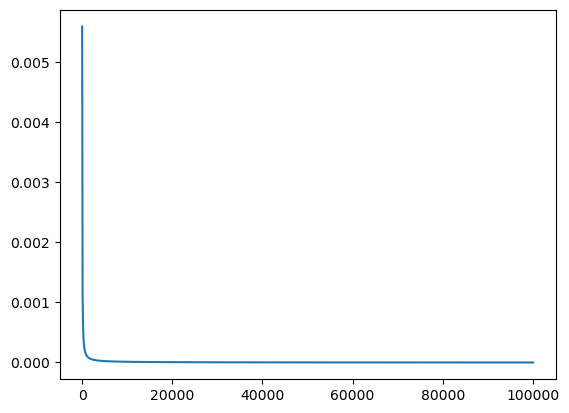

In [188]:
plt.plot(es, A*TDerivativeSimple(es, 26, 0.2))

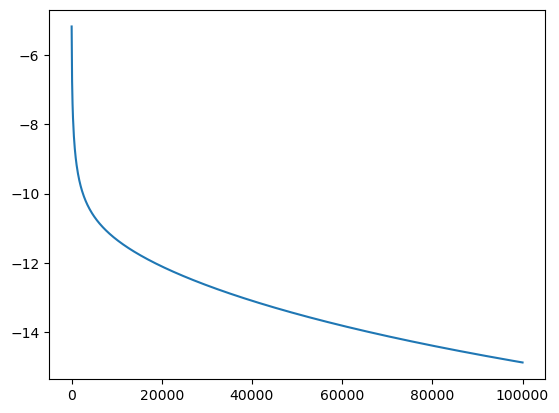

In [170]:
plt.plot(es, np.log(A*TDerivativeSimple(es, 26, 0.2)))

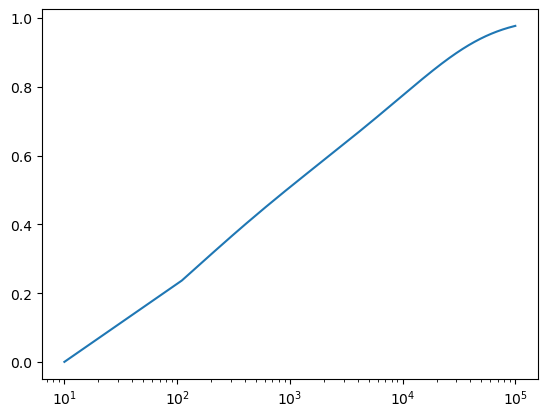

In [187]:
plt.plot(es, (A*cdf(es, 10, 0.2)))
# plt.yscale('log')
plt.xscale('log')

In [176]:
def realCDF(E, r=0):
  return A*cdf(E, 10, 0.2) - r

def randGen(num=1):
  res = []
  r_vals = np.random.rand(num)
  for r in r_vals:
    res.append(fsolve(lambda x: realCDF(x, r=r), 0.5)[0])
  return res

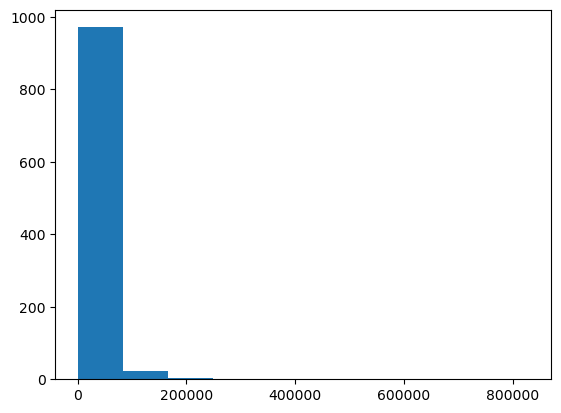

In [165]:
h = plt.hist(randGen(1000))